In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [45]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/Automobile_insurance_fraud.csv')
print('row,column',df.shape)
print ('column_namedf',df.columns)
df.head(5)

row,column (1000, 40)
column_namedf Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [46]:
for i in df:
    un=df[i].unique().size
    print (i,un)

months_as_customer 391
age 46
policy_number 1000
policy_bind_date 951
policy_state 3
policy_csl 3
policy_deductable 3
policy_annual_premium 991
umbrella_limit 11
insured_zip 995
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
capital-gains 338
capital-loss 354
incident_date 60
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
incident_hour_of_the_day 24
number_of_vehicles_involved 4
property_damage 3
bodily_injuries 3
witnesses 4
police_report_available 3
total_claim_amount 763
injury_claim 638
property_claim 626
vehicle_claim 726
auto_make 14
auto_model 39
auto_year 21
fraud_reported 2
_c39 1


In [47]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [48]:
## Only one column has no value, we can drop that column:
df=df.drop(columns=['_c39'])

In [49]:
## Ploicy No and Location has 1000 diffent value in Column we can consider this as unique value:
df=df.drop(columns=['policy_number','incident_location'])

In [50]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

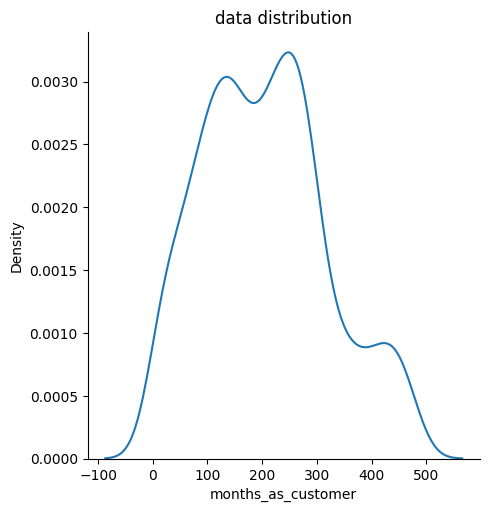

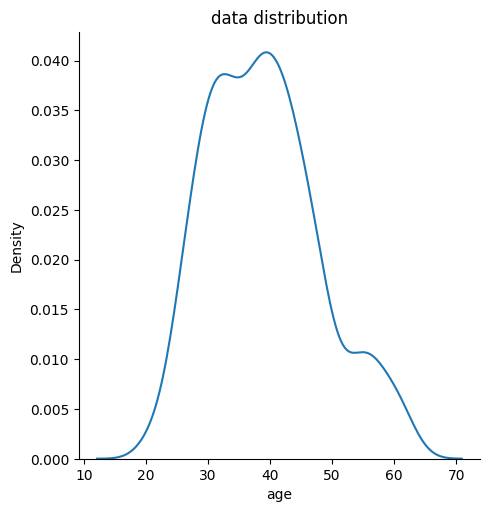

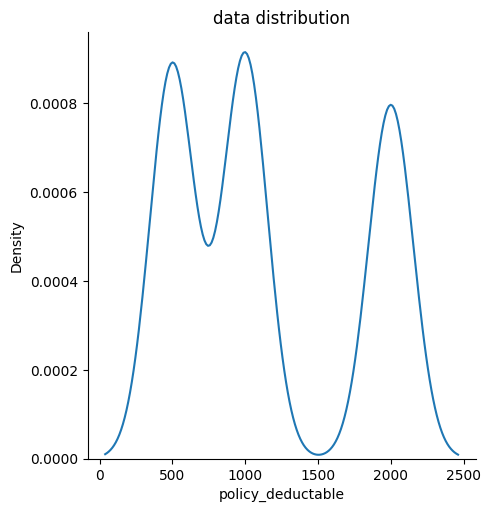

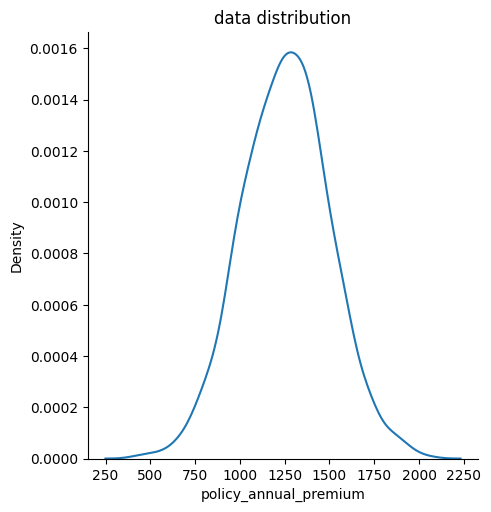

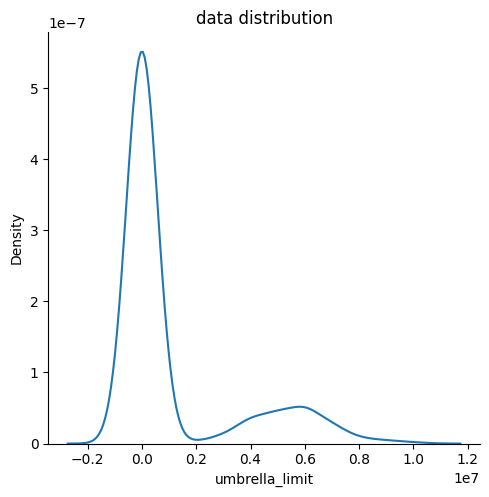

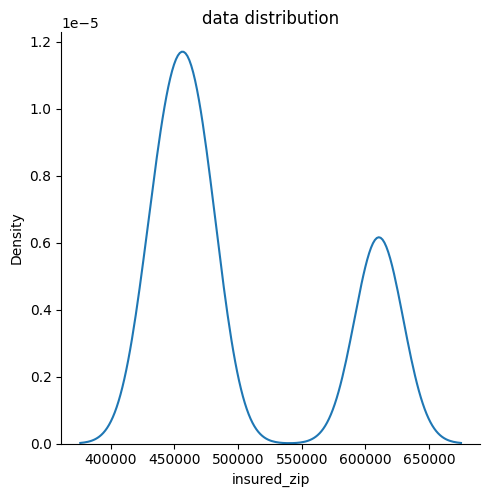

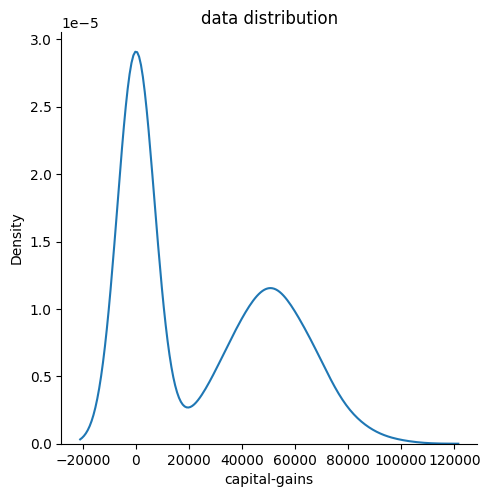

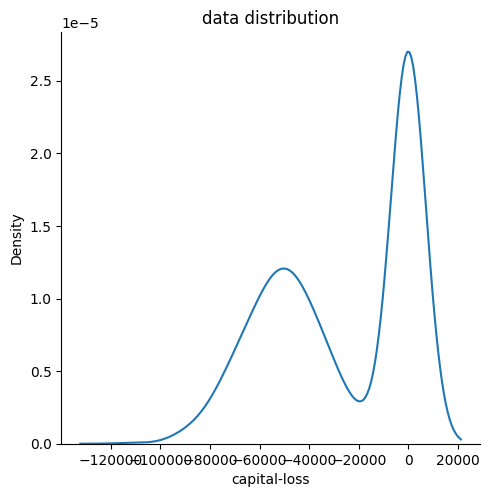

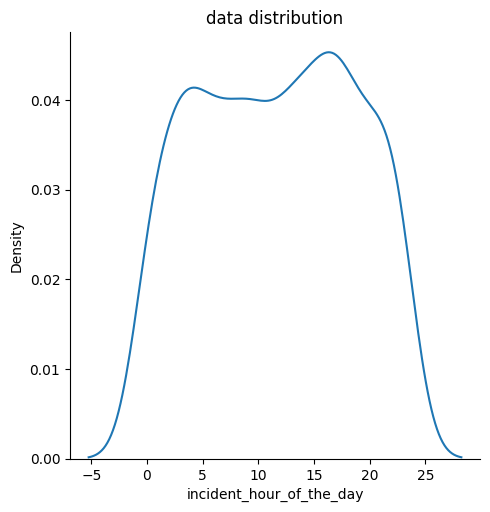

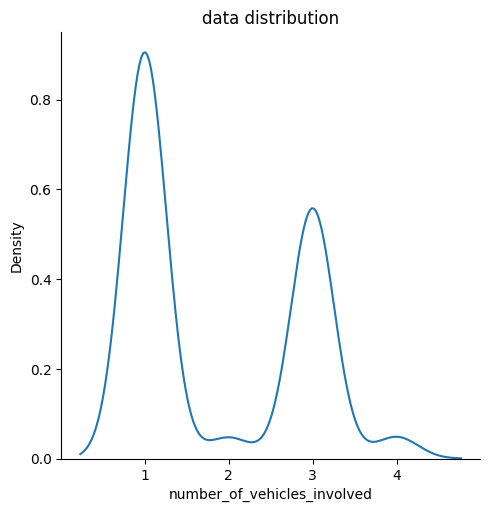

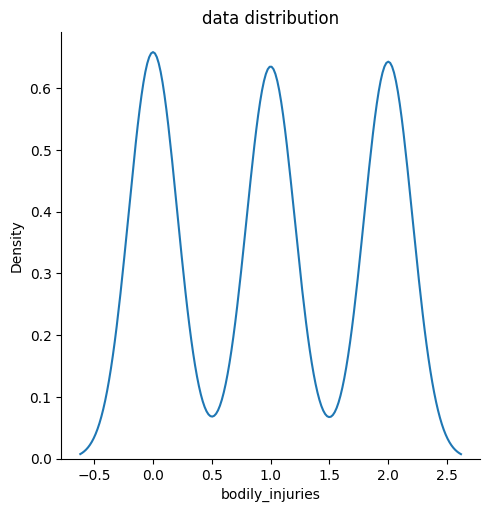

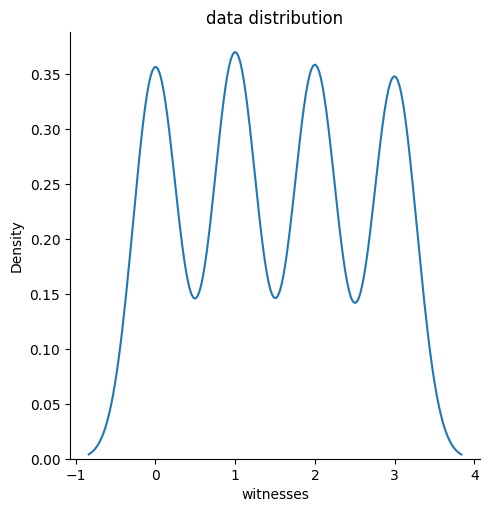

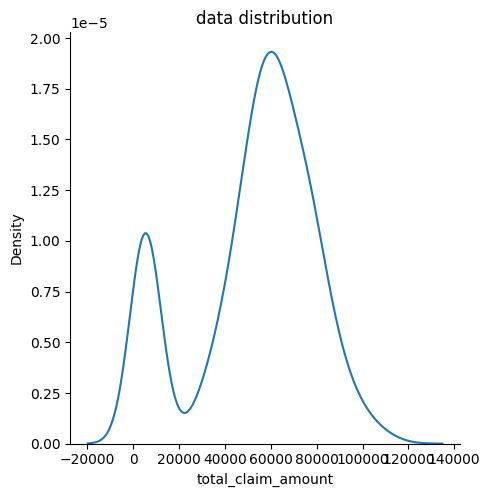

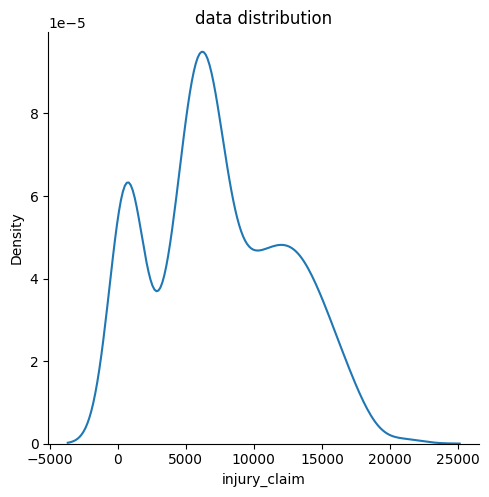

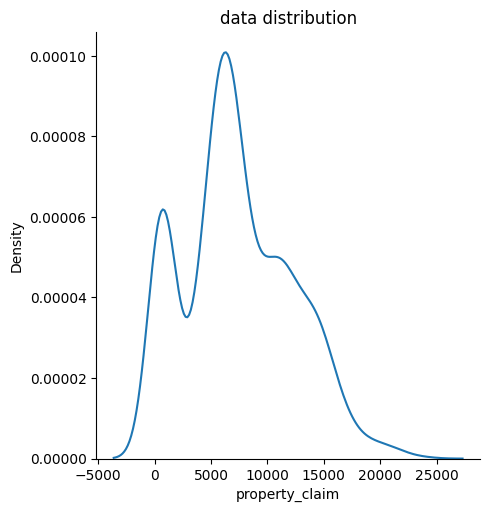

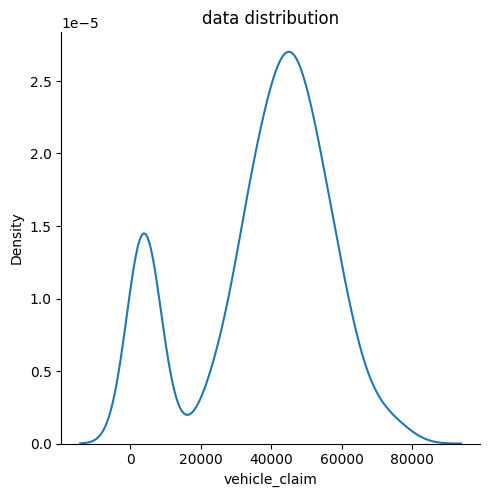

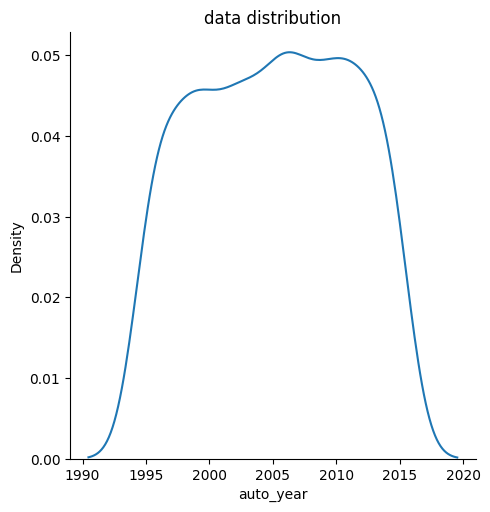

In [51]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        sns.displot(df,x=i,kind='kde')
        plt.xlabel(i)
        plt.title('data distribution')
        plt.show()
    else: pass 

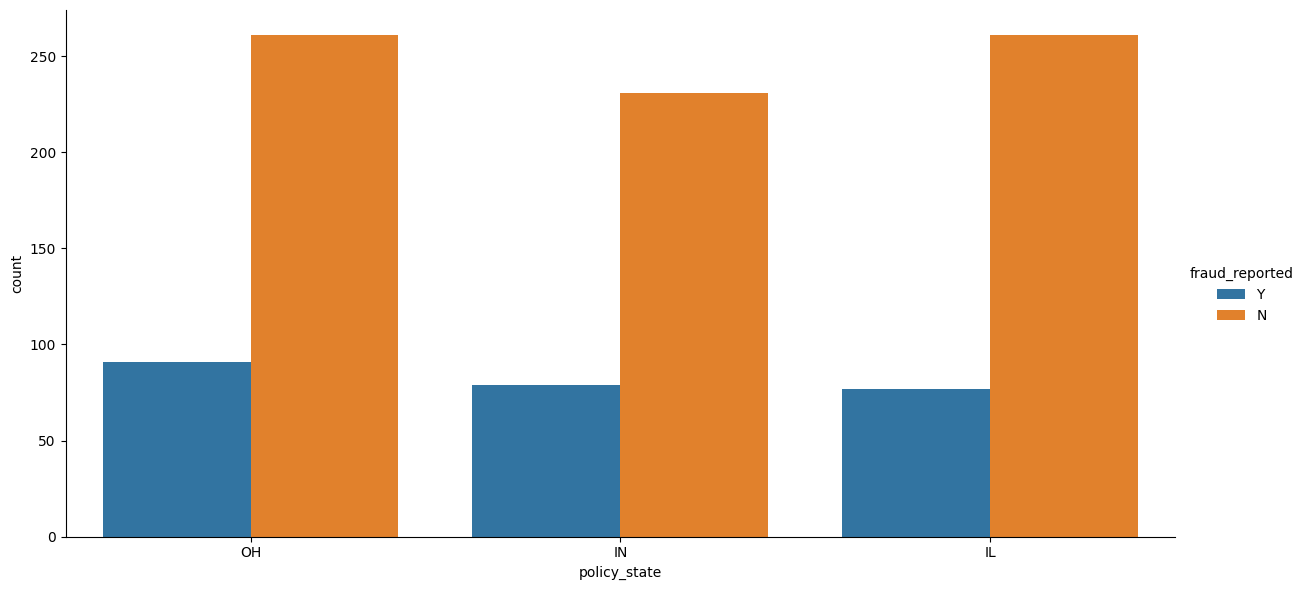

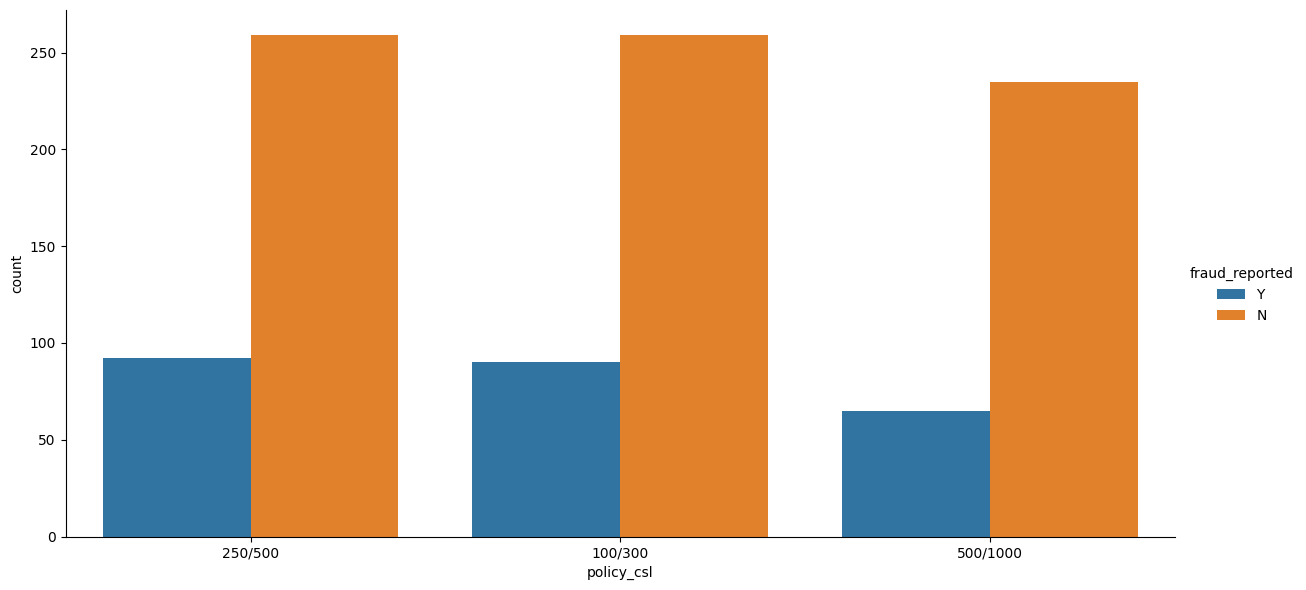

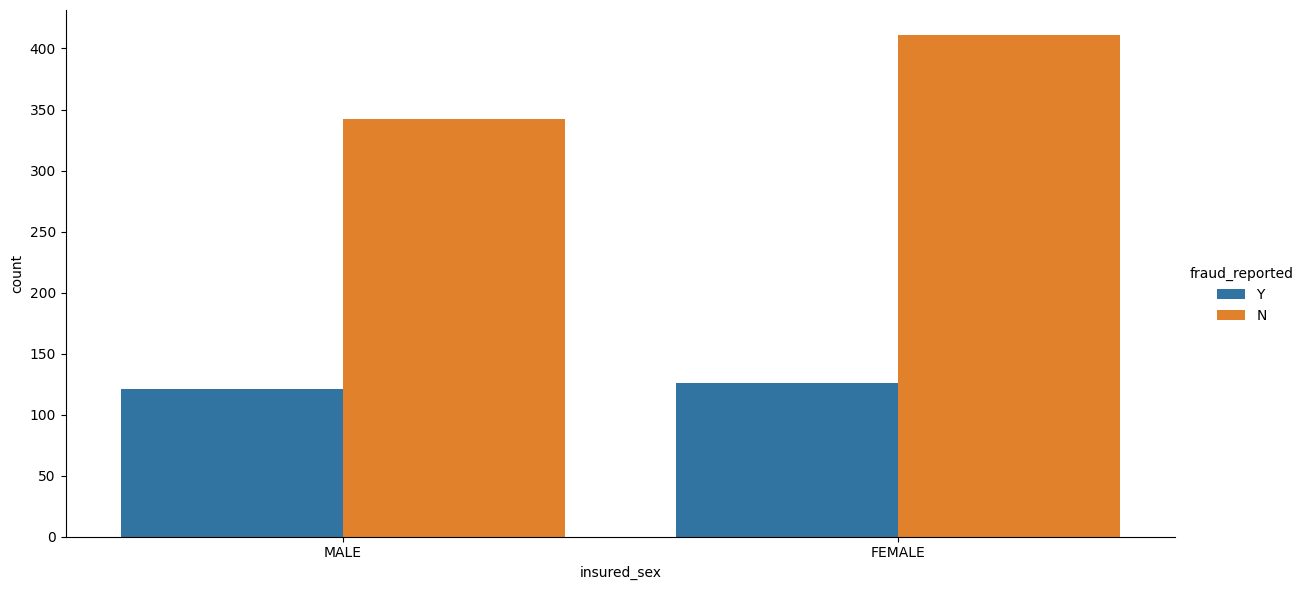

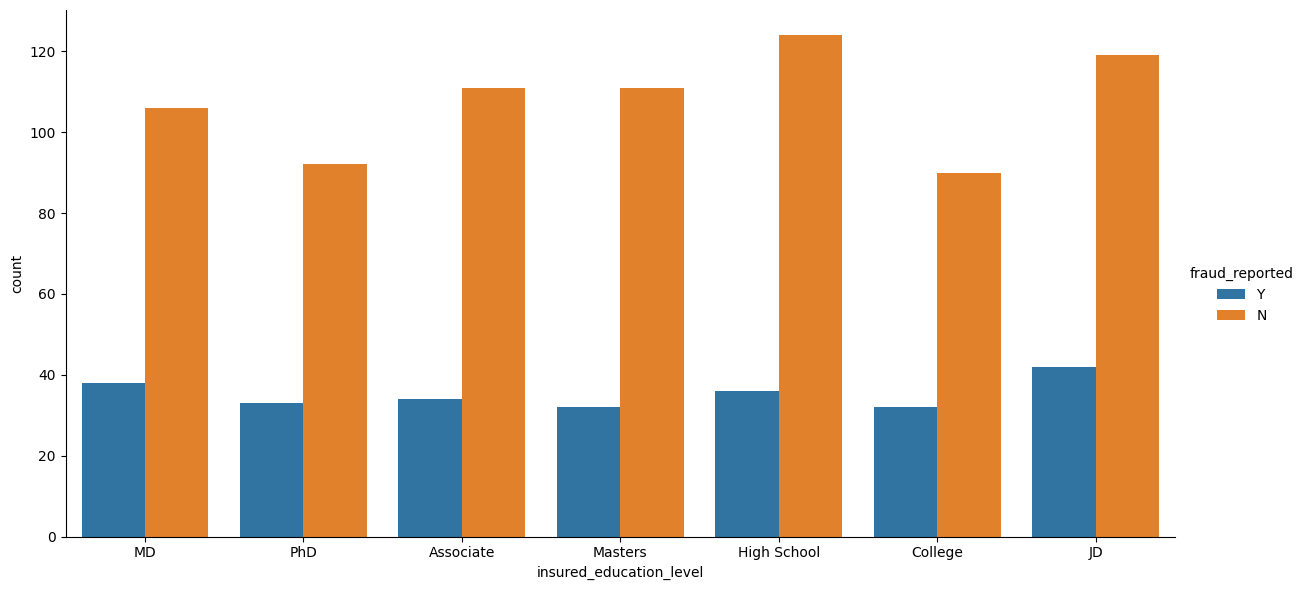

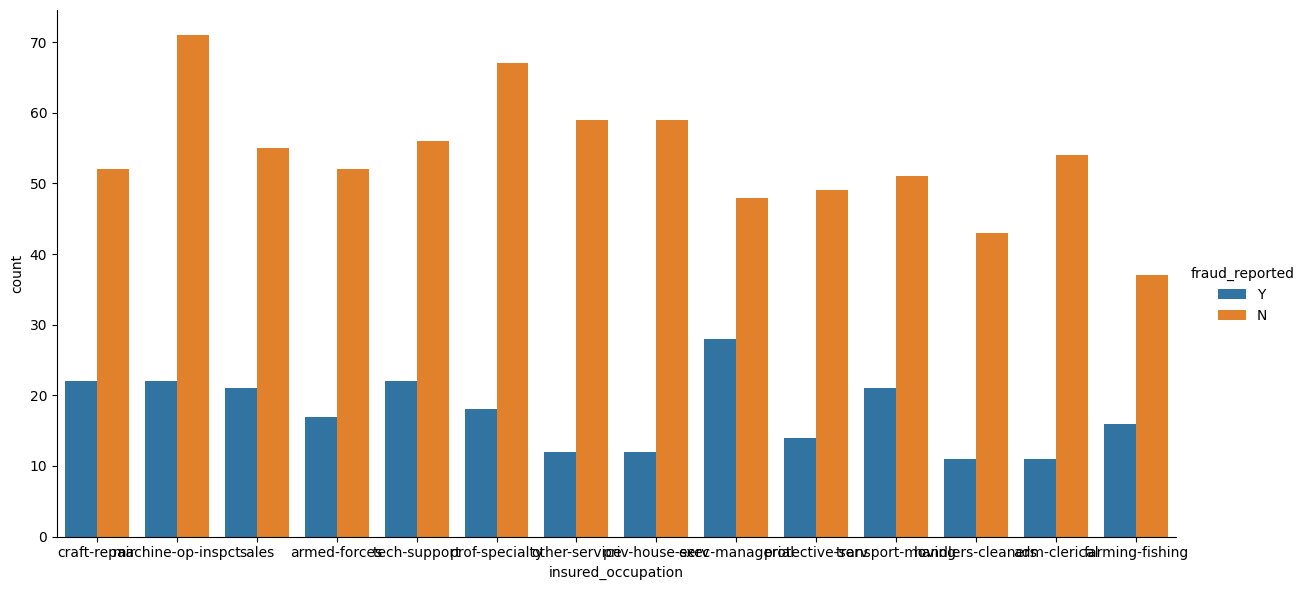

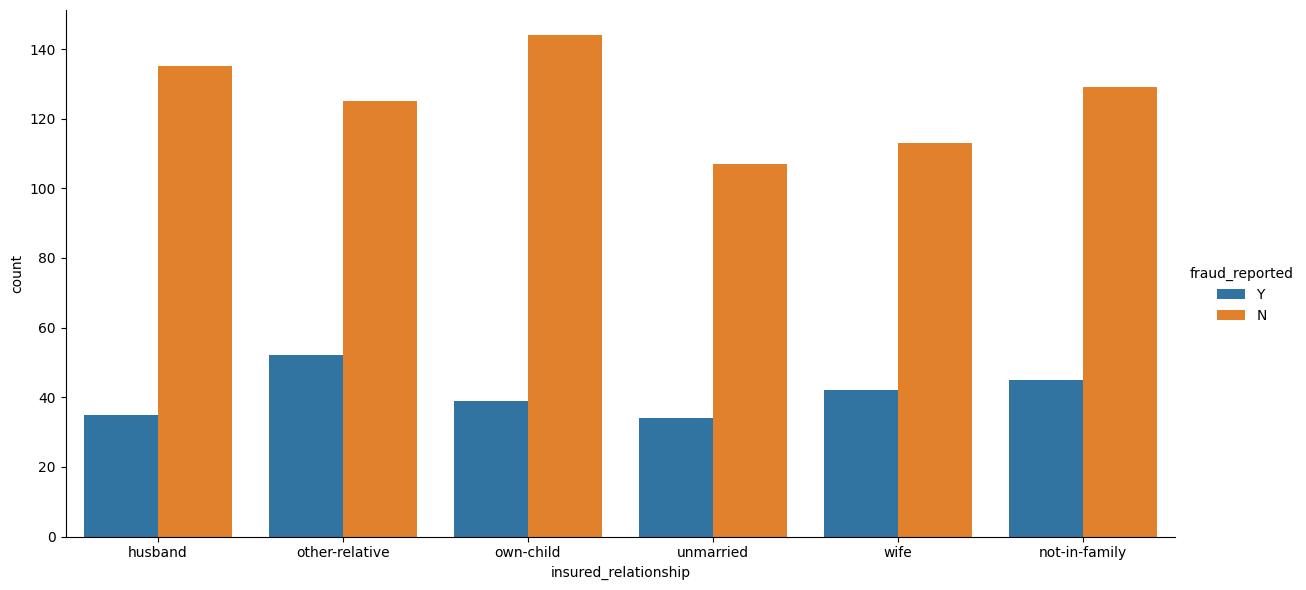

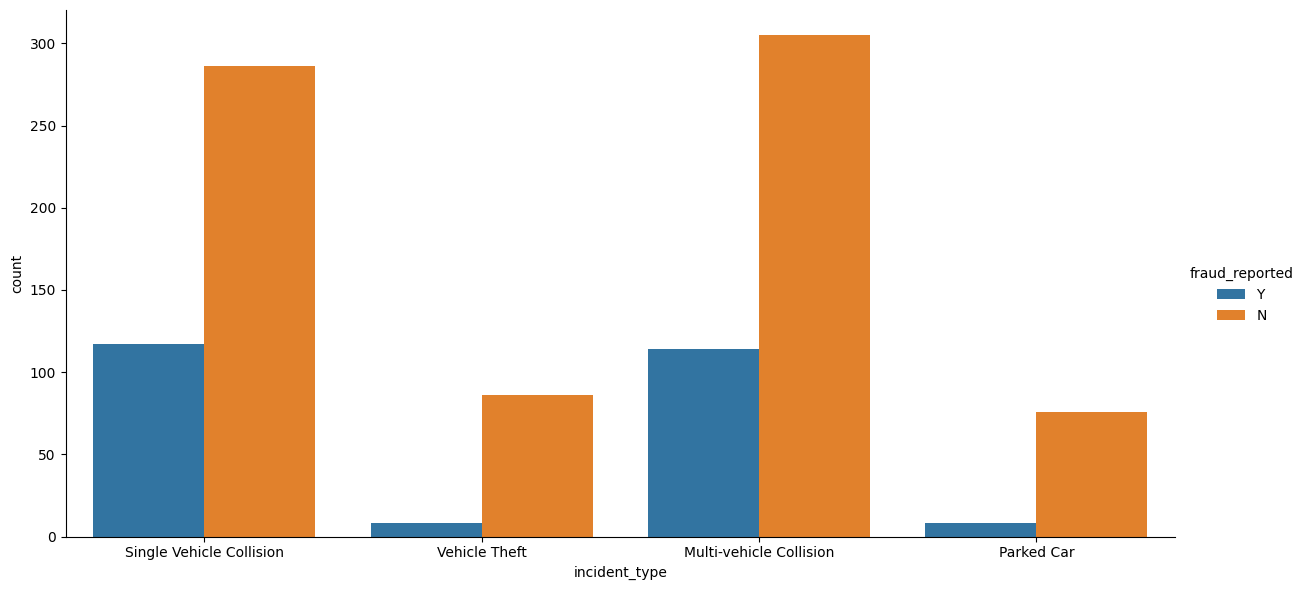

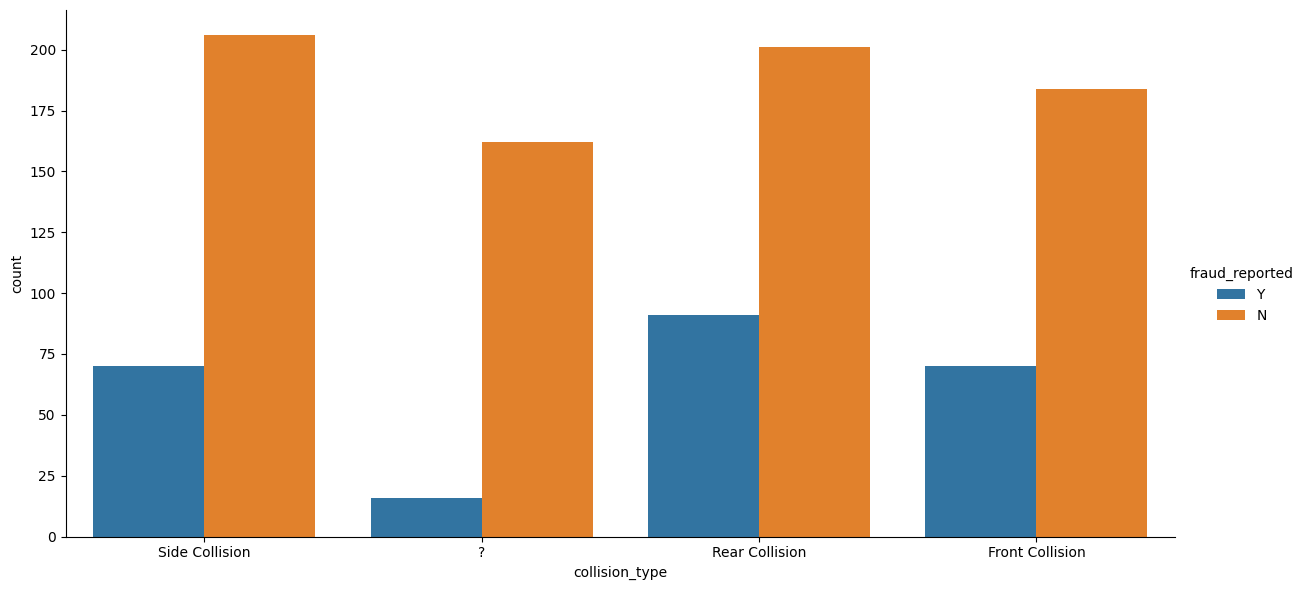

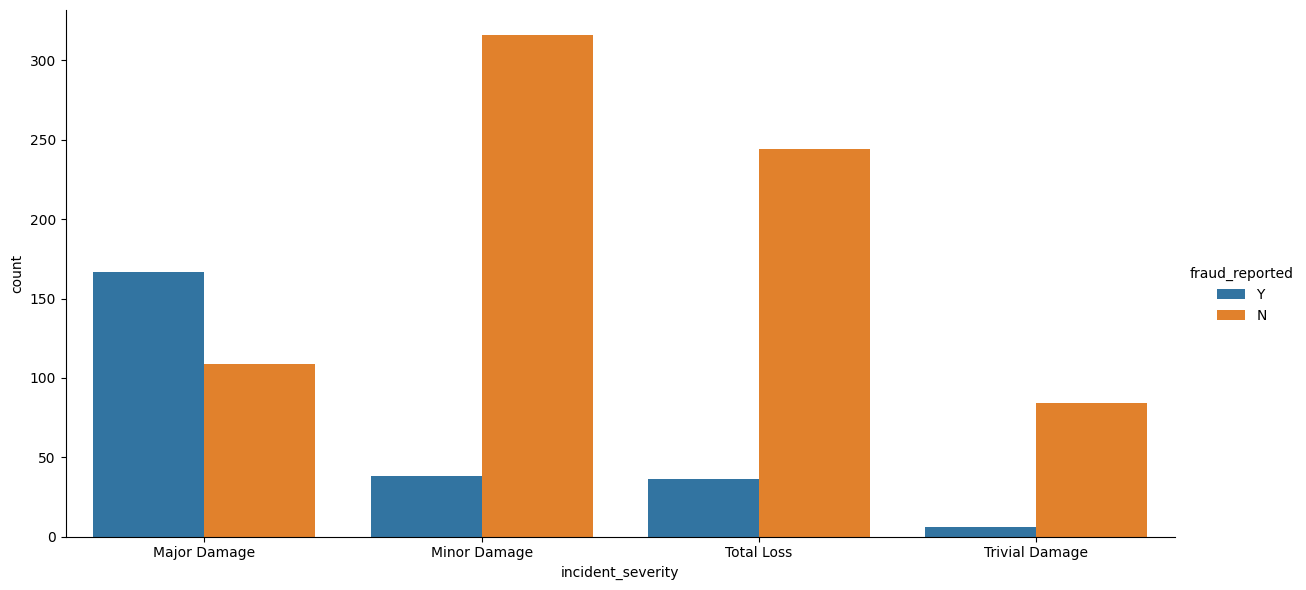

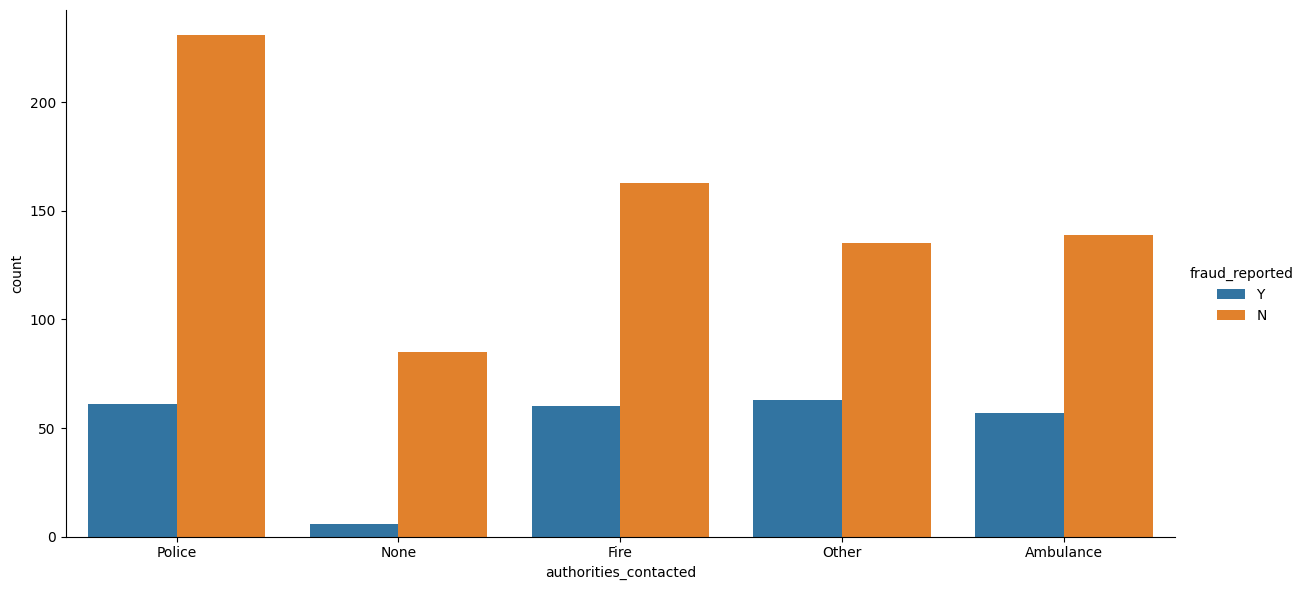

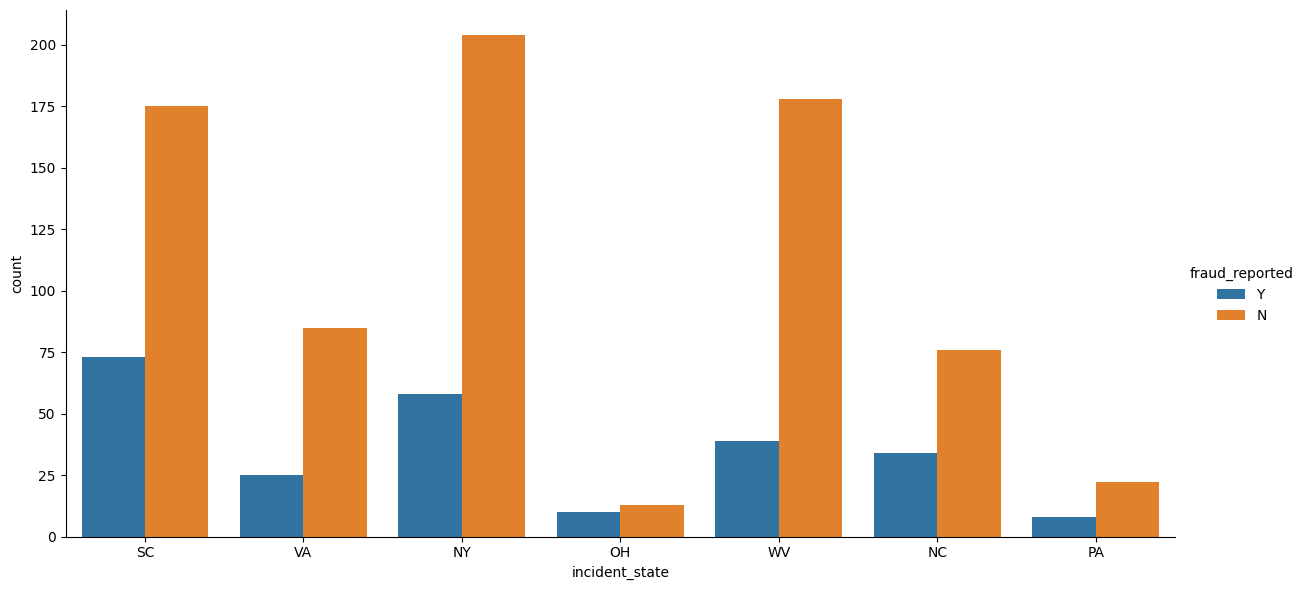

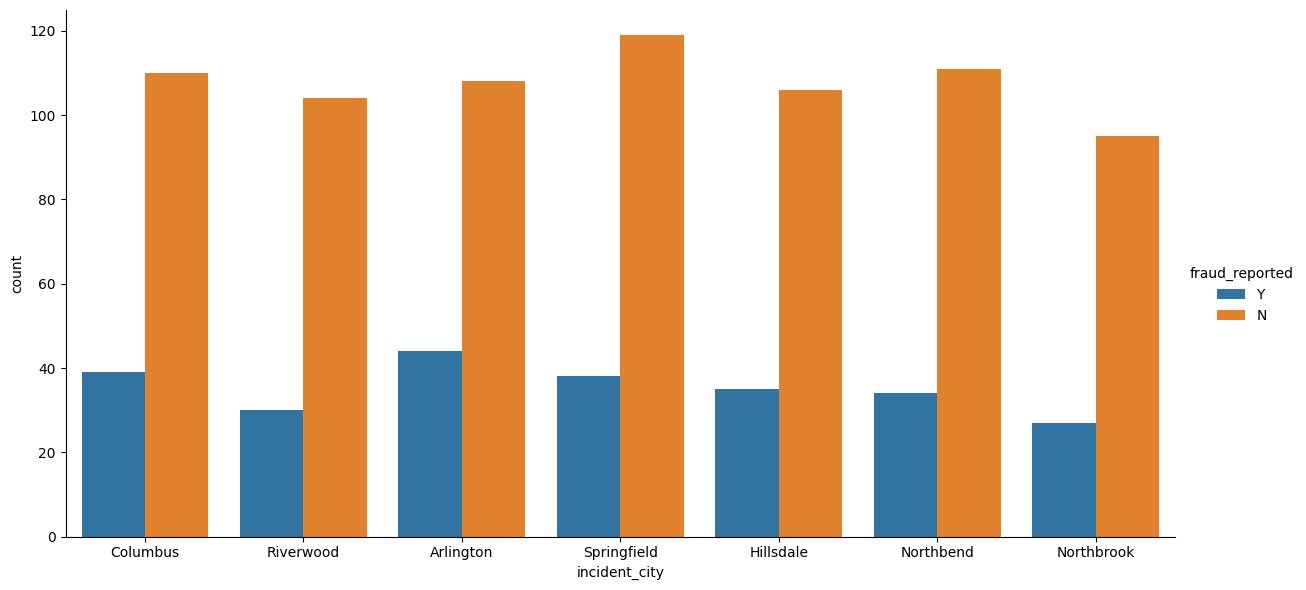

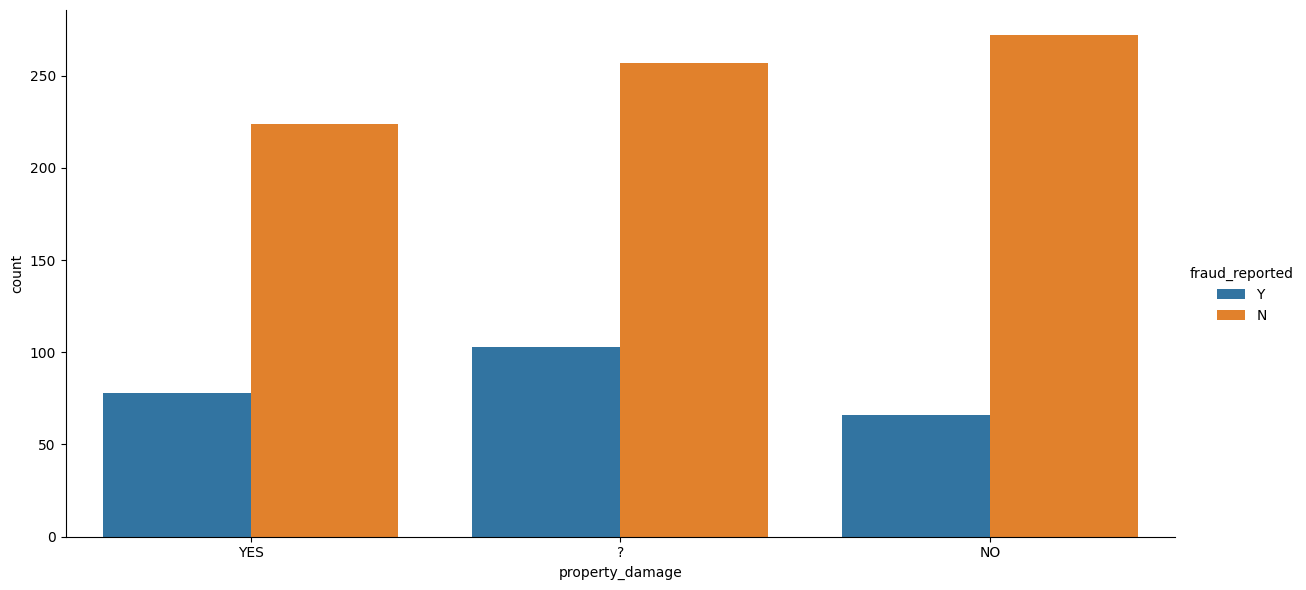

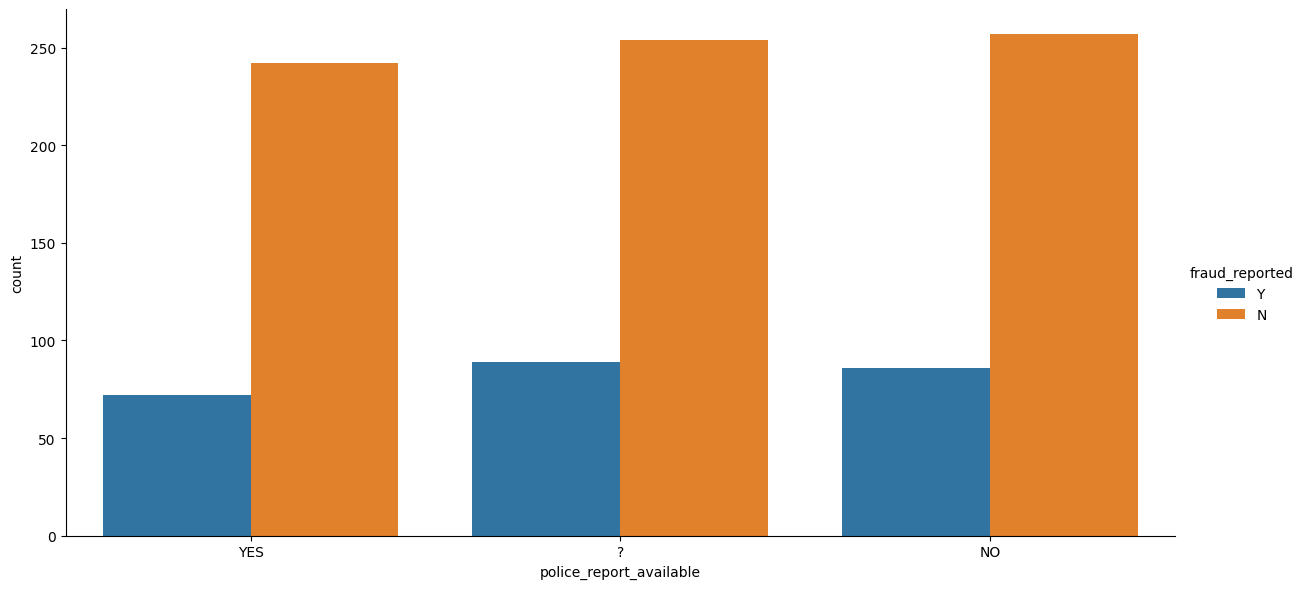

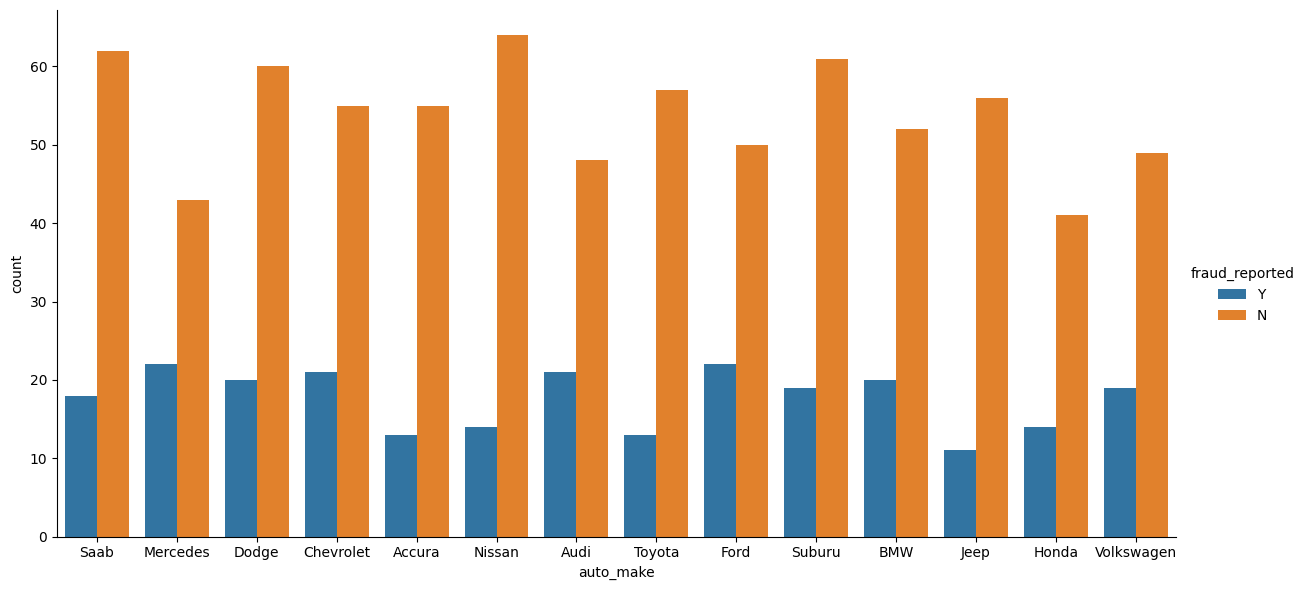

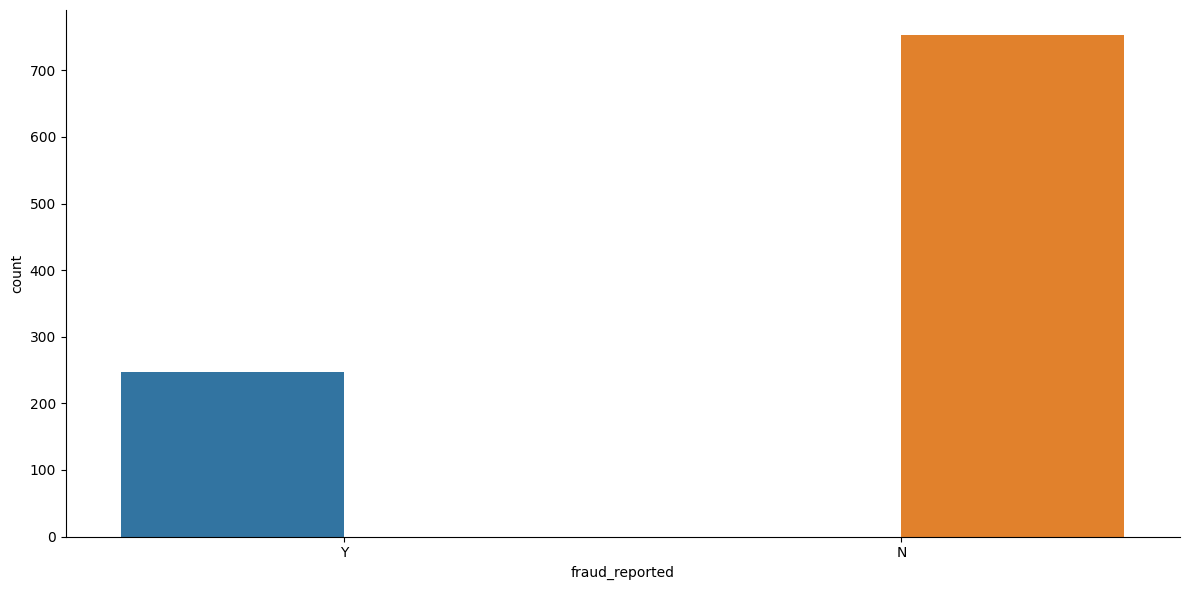

In [52]:
for i in df:
    if df[i].dtype==object:
        if df[i].unique().size <20:
            sns.catplot(df,x=i,kind='count',hue='fraud_reported',height=6,aspect=2)
            plt.show()
        else:pass
    else:pass

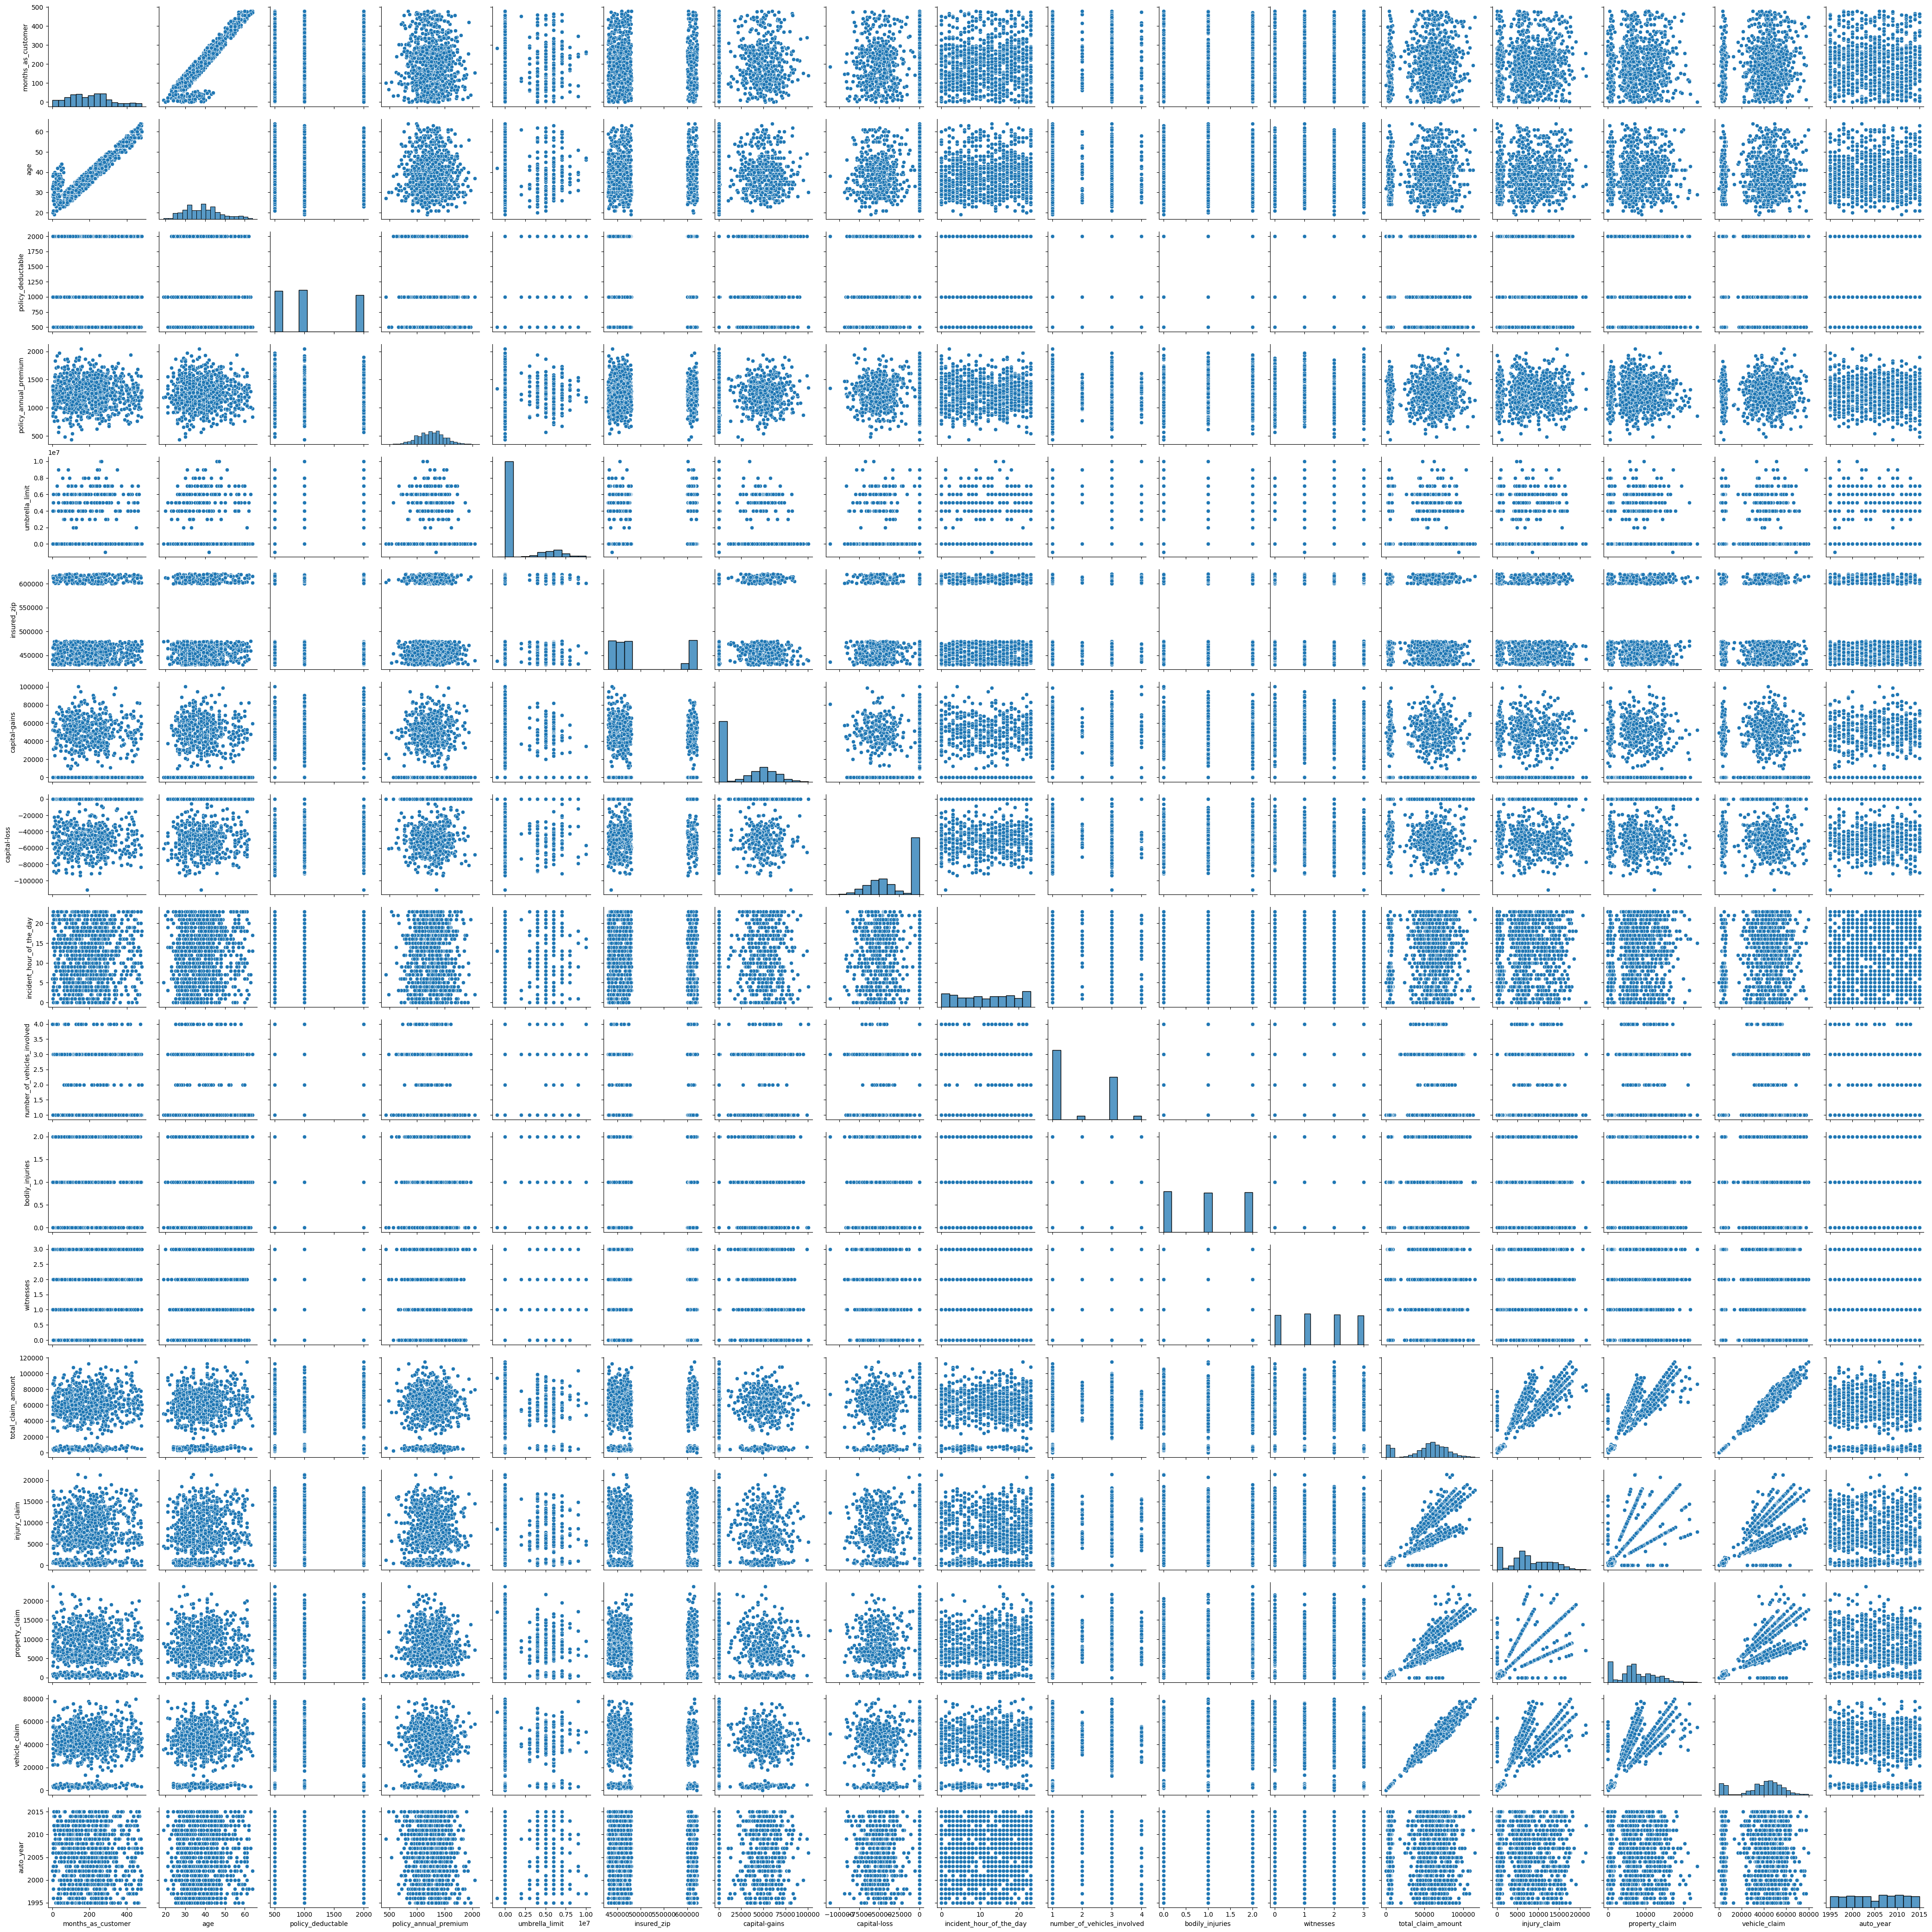

In [53]:
sns.pairplot(df)
plt.show()

In [54]:
## Transforming the object value into numaric value:
oe=OrdinalEncoder()
for column in df:
    if df[column].dtype==object:
        oe=OrdinalEncoder()
        df[column]=oe.fit_transform(df[column].values.reshape(-1,1))
    else:pass 
print(df)

     months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                   328   48             532.0           2.0         1.0   
1                   228   42             821.0           1.0         1.0   
2                   134   29             186.0           2.0         0.0   
3                   256   41             766.0           0.0         1.0   
4                   228   44             181.0           0.0         2.0   
..                  ...  ...               ...           ...         ...   
995                   3   38             487.0           2.0         2.0   
996                 285   41             129.0           0.0         0.0   
997                 130   34             509.0           2.0         1.0   
998                 458   62             573.0           0.0         2.0   
999                 456   60             359.0           2.0         1.0   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0        

In [55]:
## Analysis the skew ness and modification
for i in df:
    x=df[i].skew()
    if x>=5:
        df[i]=np.cbrt(df[i])
    else:pass
    
print('modified skewness of "df_data" is:')
print('=======================================')
print(df.skew())

modified skewness of "df_data" is:
months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
numbe

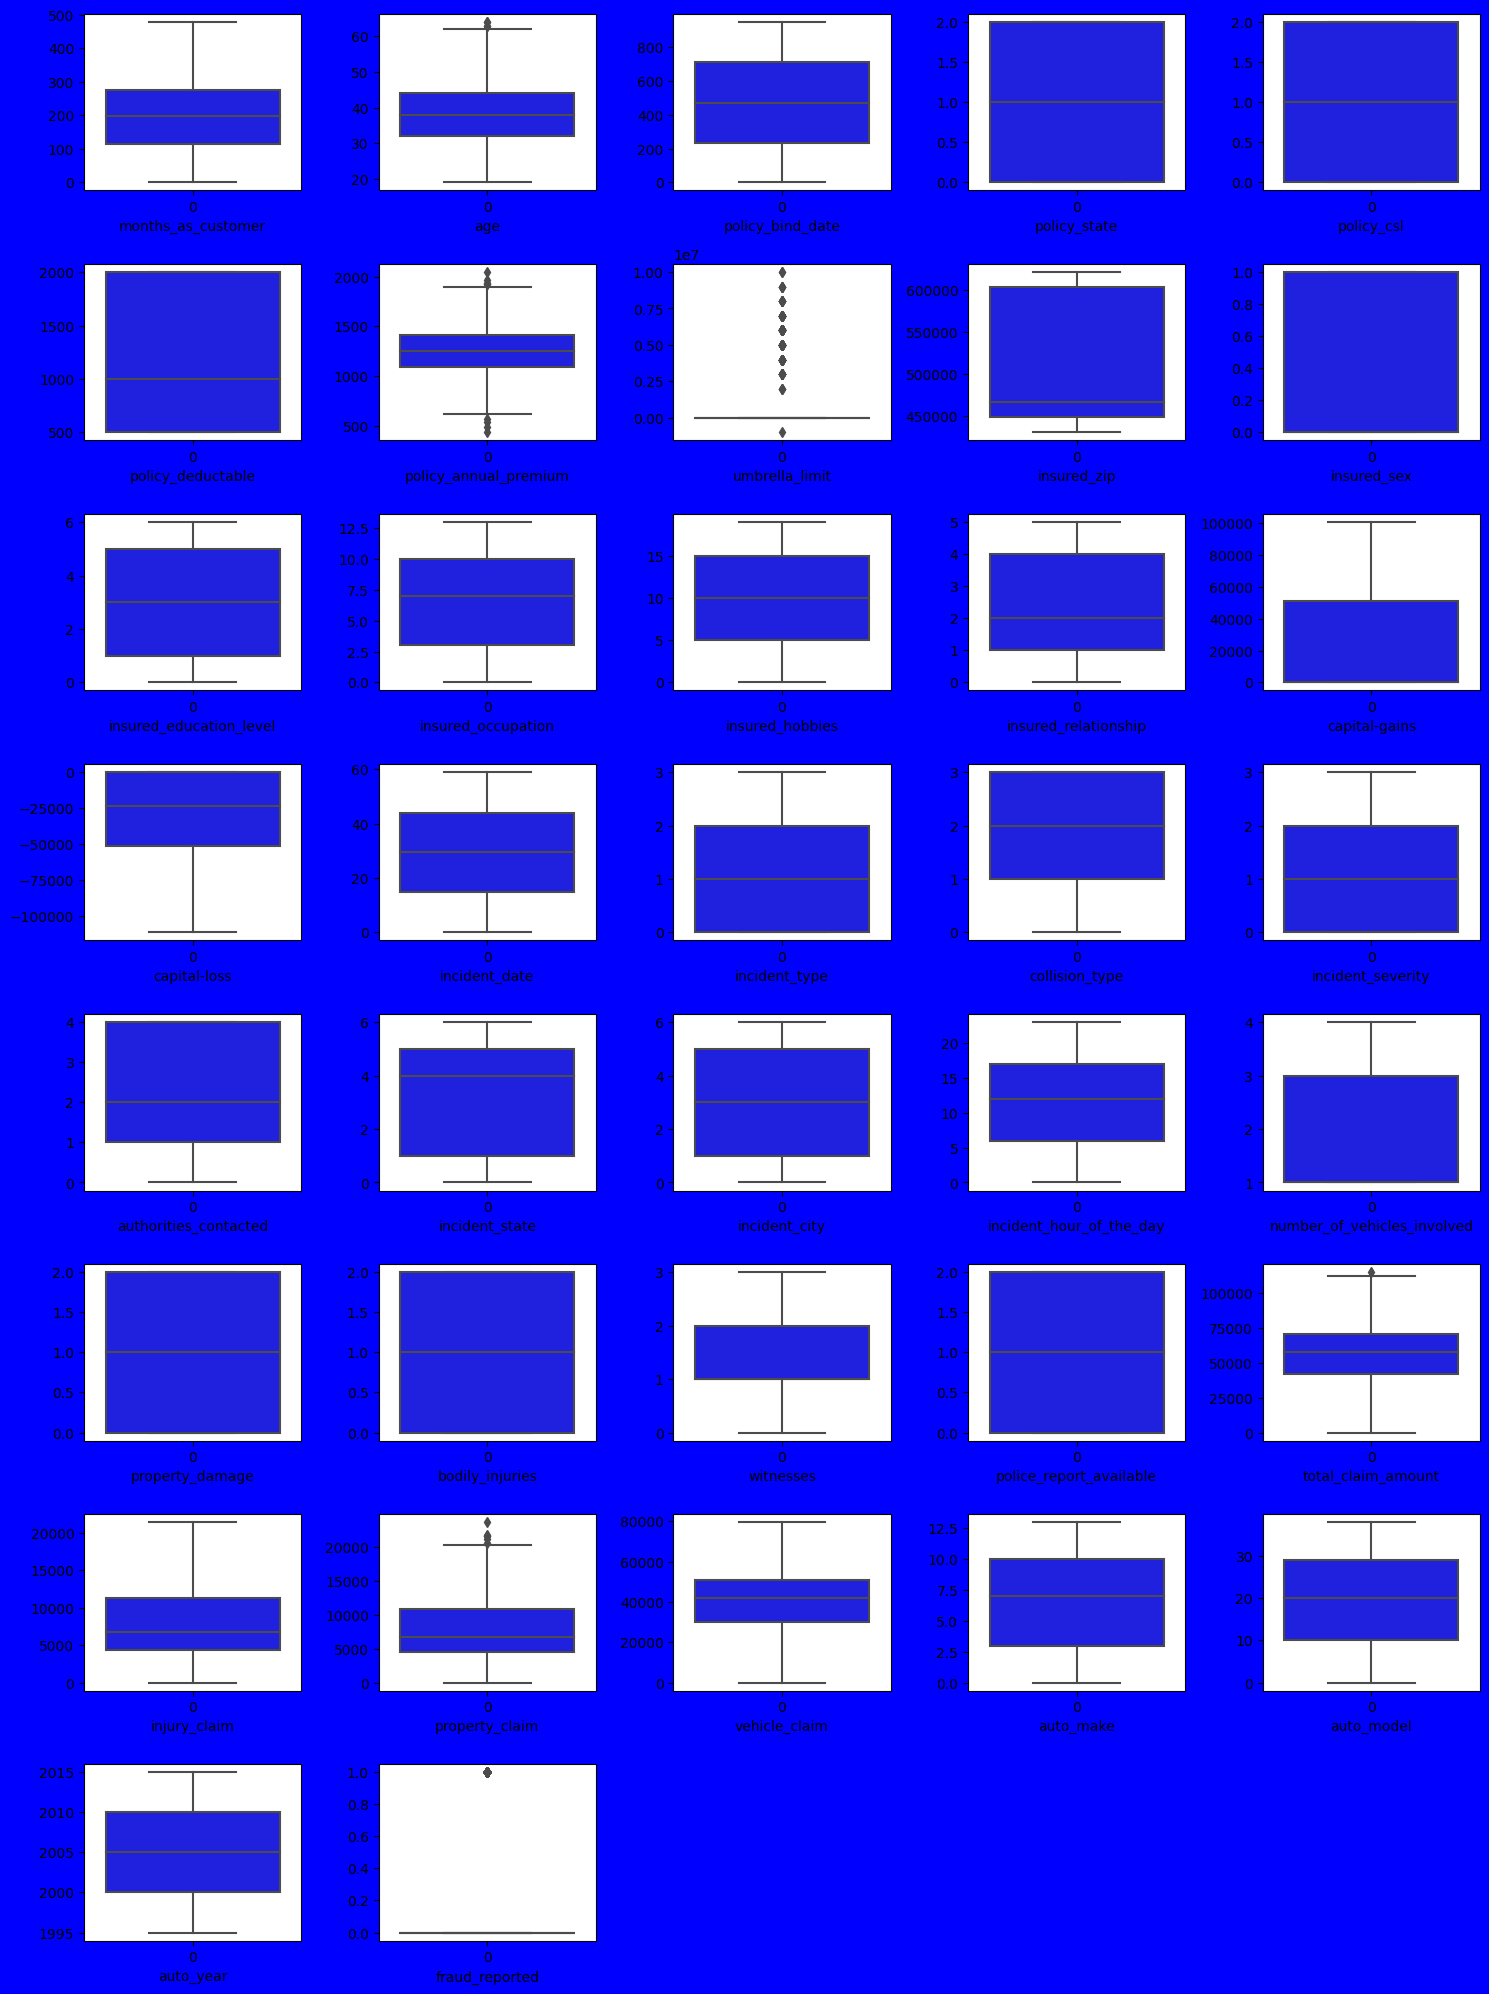

In [56]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    plt.subplot(8,5,plotnumber)
    sns.boxplot(df[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [57]:
from scipy.stats import zscore
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/(df.shape[0])*100)

## dataloss:
2.0


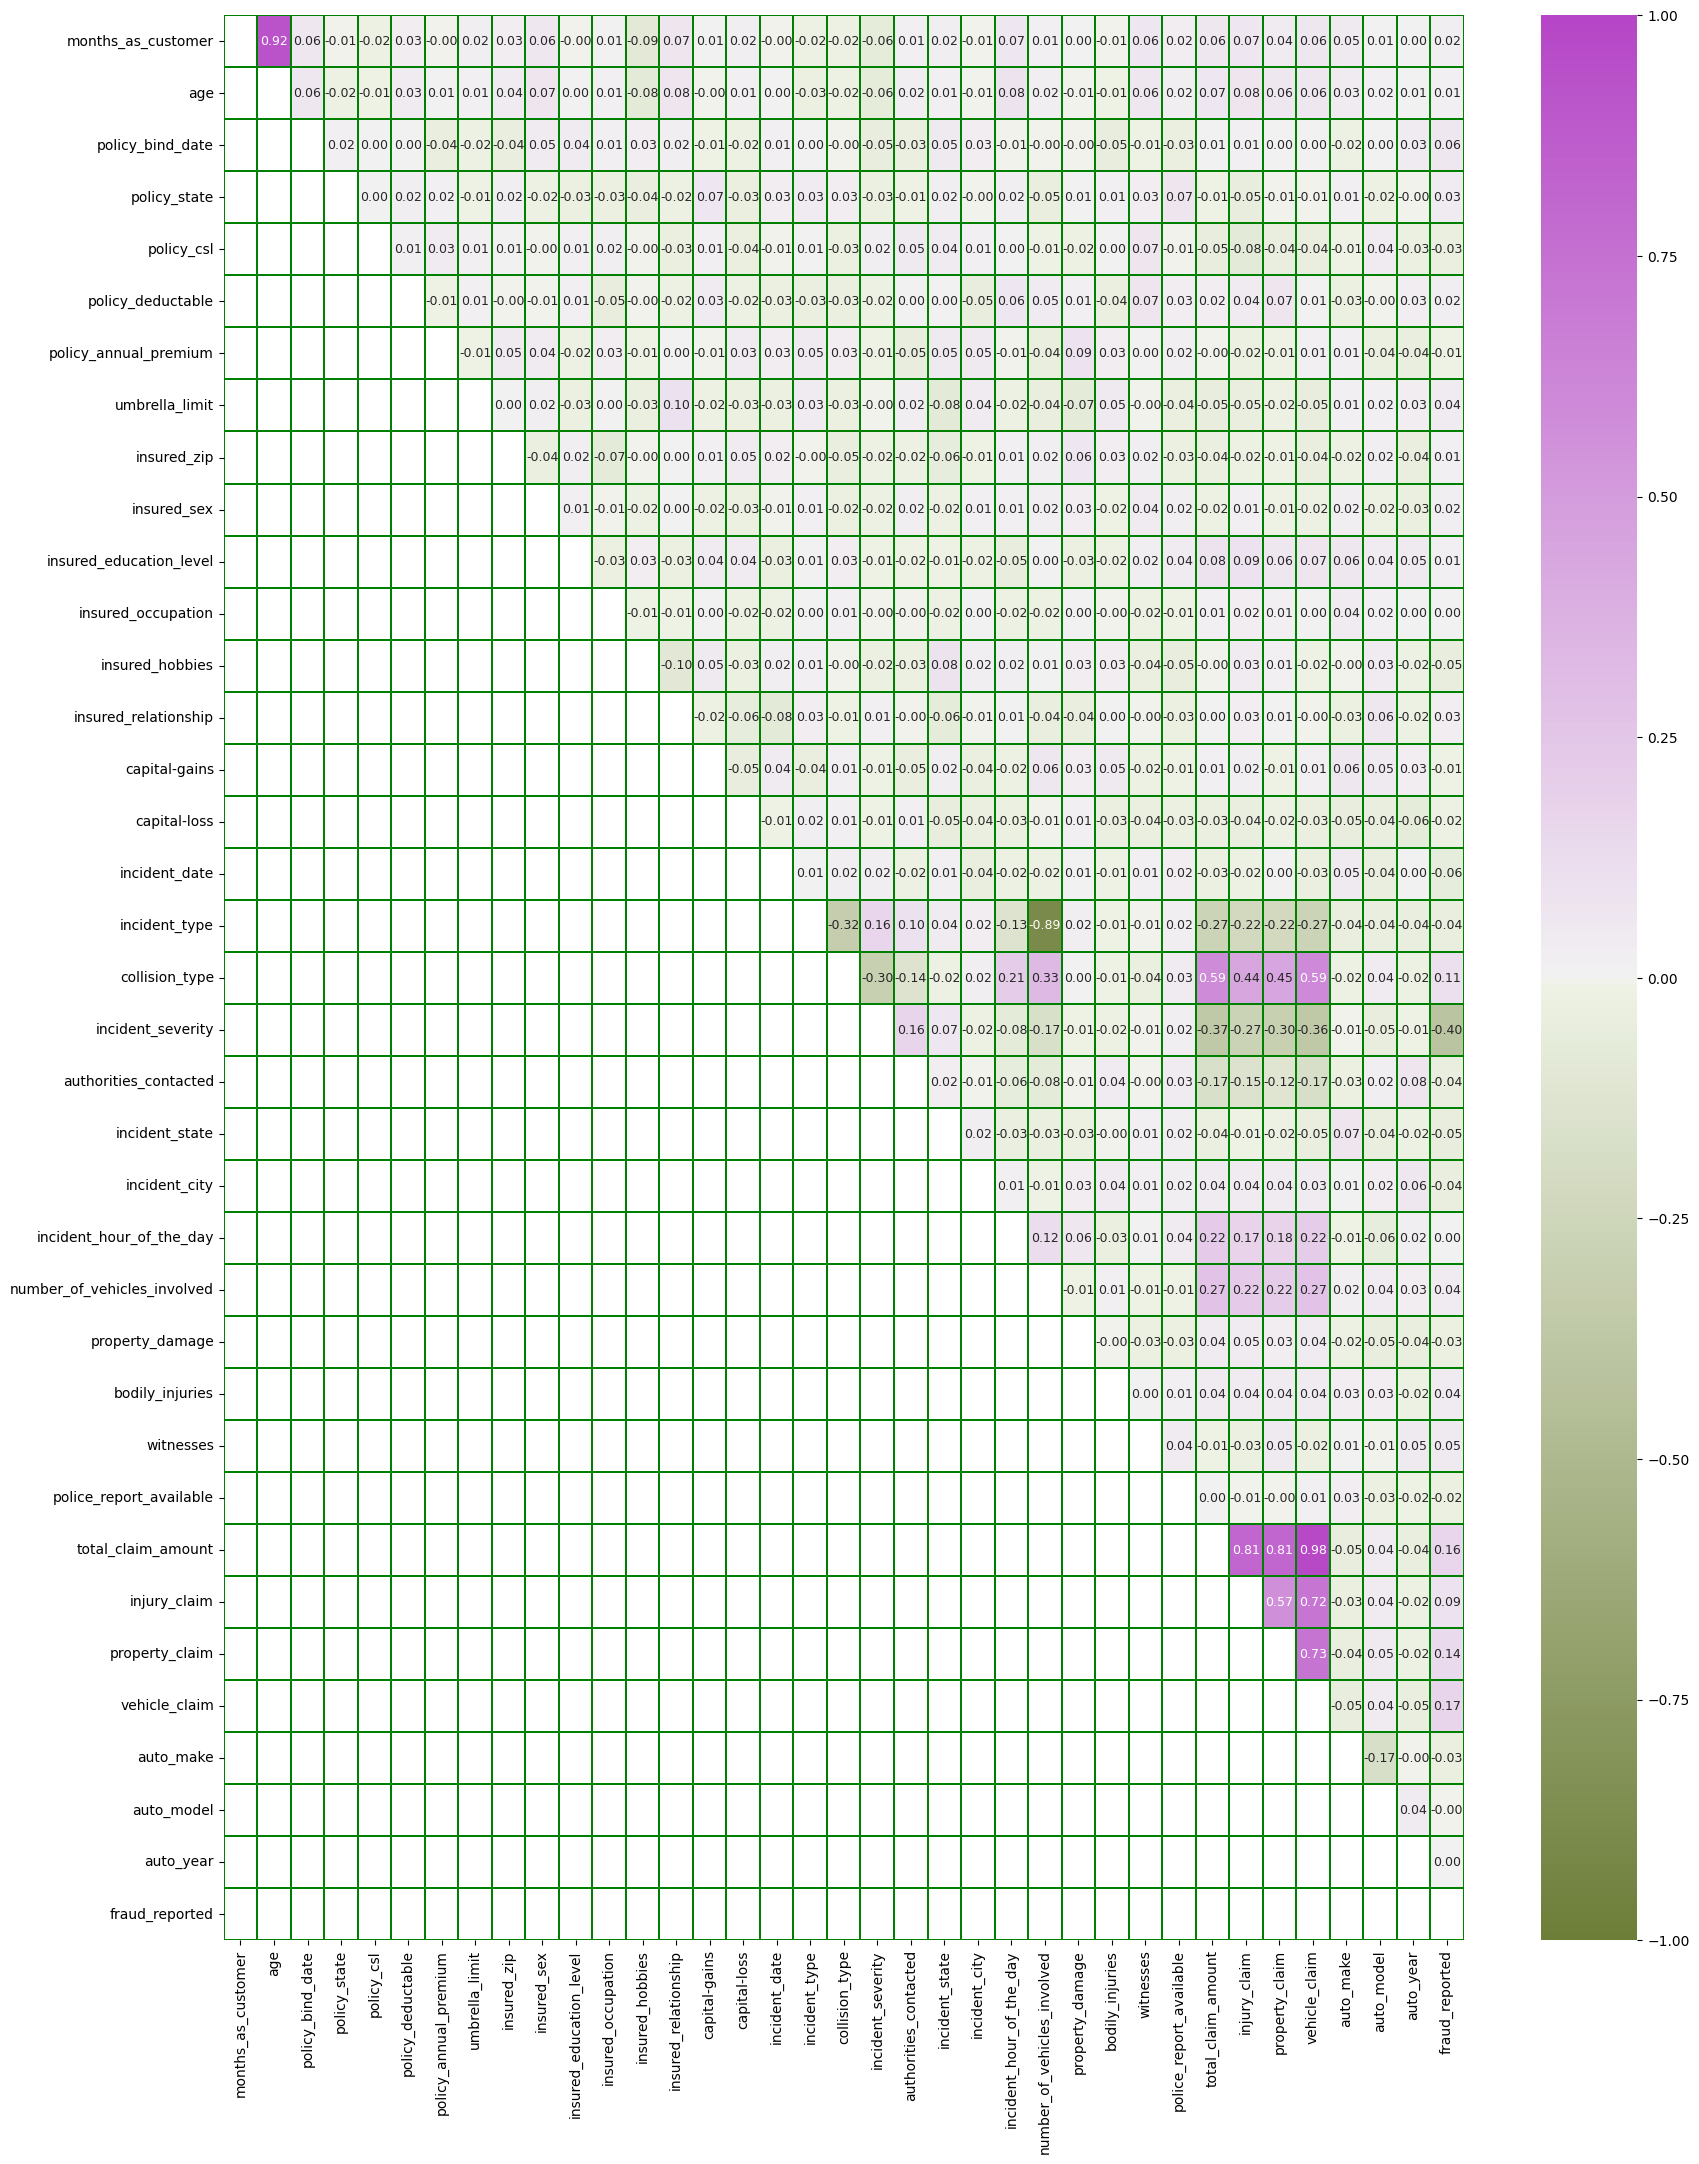

In [58]:
v=df_z.corr()
plt.figure(figsize=(20,25))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':9},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

In [59]:
x=df.drop(columns='fraud_reported')
y=df['fraud_reported']

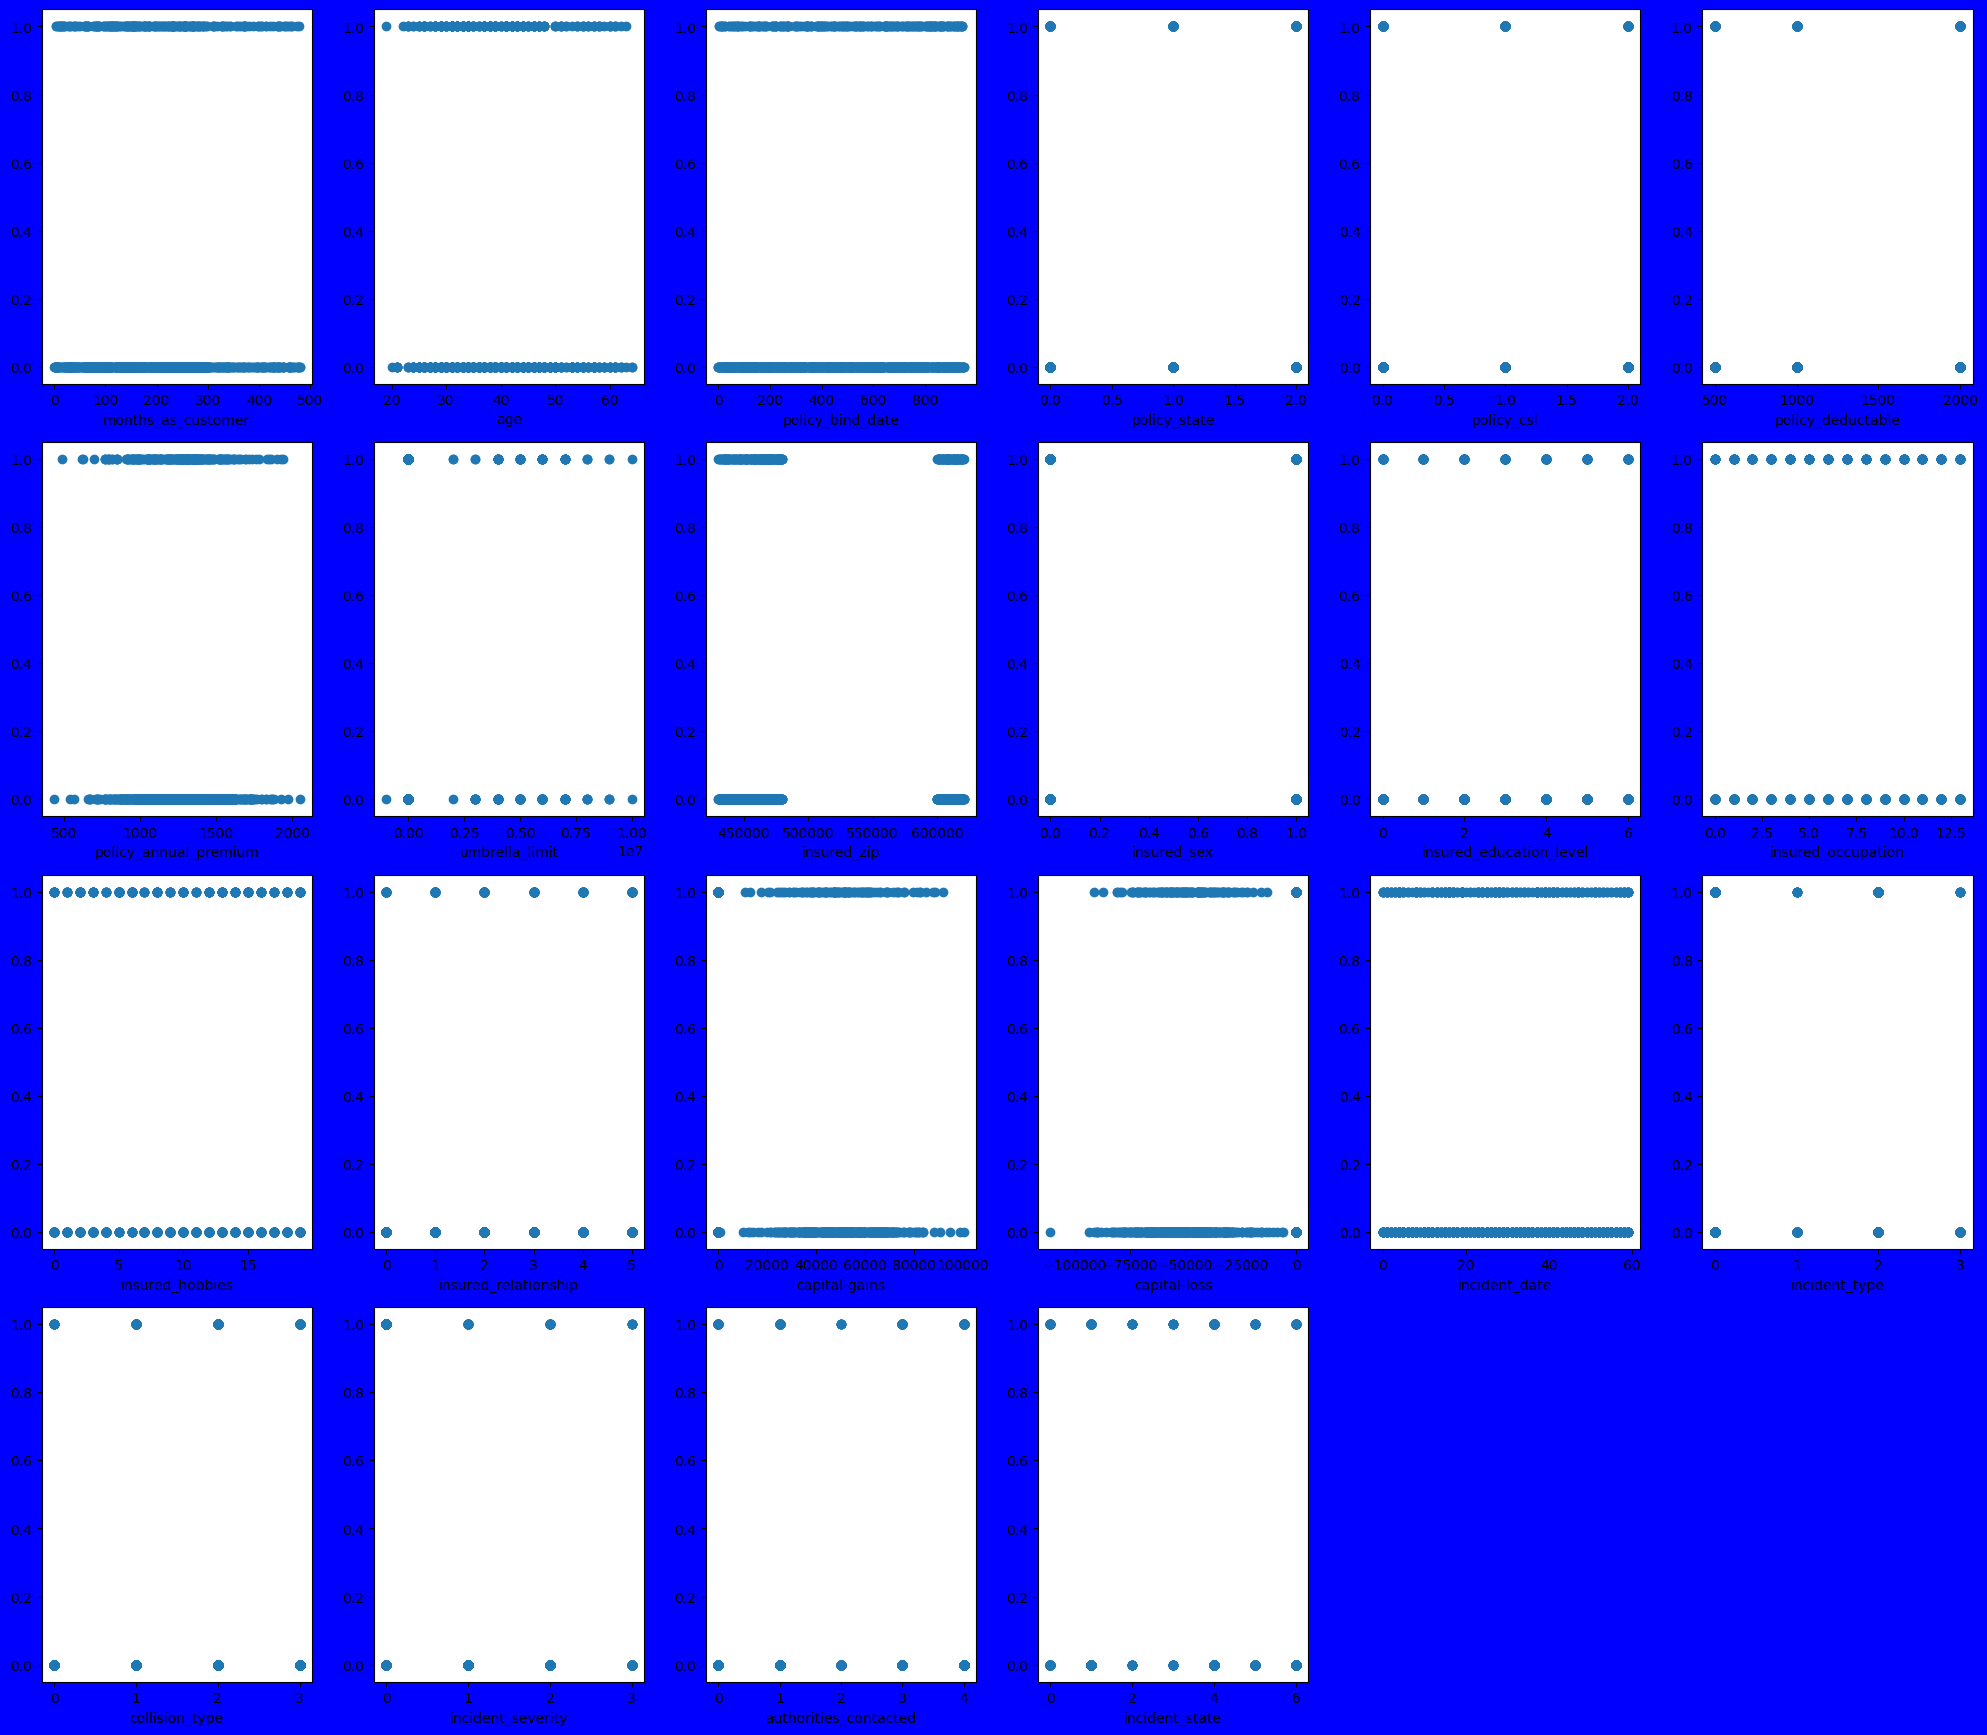

In [60]:
plt.figure(figsize=(20,30), facecolor= 'blue')
plotnumber=1
for column in x:
    if plotnumber <=22:
        plt.subplot(7,6,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plotnumber+=1
plt.tight_layout()

In [61]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

vif                      feature
0    28.316768           months_as_customer
1   131.387078                          age
2     4.071451             policy_bind_date
3     2.570394                 policy_state
4     2.457296                   policy_csl
5     4.615725            policy_deductable
6    28.574780        policy_annual_premium
7     1.266746               umbrella_limit
8    51.470295                  insured_zip
9     1.912471                  insured_sex
10    3.445142      insured_education_level
11    3.814315           insured_occupation
12    4.136614              insured_hobbies
13    3.220887         insured_relationship
14    1.877137                capital-gains
15    1.981664                 capital-loss
16    4.007139                incident_date
17   11.063561                incident_type
18    5.935471               collision_type
19    3.132511            incident_severity
20    3.207626        authorities_contacted
21    3.407453               incident_state
22    3.171850                incident_city
23    4.211350     incident_hour_of_the_day
24   21.768609  number_of_vehicles_involved
25    2.430928              property_damage
26    2.524634              bodily_injuries
27    2.897838                    witnesses
28    2.508190      police_report_available
29         inf           total_claim_amount
30         inf                 injury_claim
31         inf               property_claim
32         inf                vehicle_claim
33    3.887233                    auto_make
34    4.267055                   auto_model
35  210.413839                    auto_year

In [62]:
x=x.drop(columns='auto_year')

In [63]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [64]:
print('sample distribution before SMOTE:',y.value_counts())

sample distribution before SMOTE: 0.0    753
1.0    247
Name: fraud_reported, dtype: int64


In [65]:
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('sample distribution after SMOTE:',y1.value_counts())

sample distribution after SMOTE: 1.0    753
0.0    753
Name: fraud_reported, dtype: int64


In [66]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.6327433628318584 on random state: 3


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [68]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
P_DTC=DTC.predict(x_test)
P_DTC_T=DTC.predict(x_train)
score_DTC=cross_val_score(DTC,x_test,y_test)
acc_dtc=accuracy_score(y_test,P_DTC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_DTC))
print('cross_val_score=',score_DTC)
print('--------------------------------------------------------------------------------------')
cv_mean_dtc=score_DTC.mean()
print('--------------------------------------------------------------------------------------')
diff_dtc_score=accuracy_score(y_test,P_DTC)-score_DTC.mean()
print('difference between accuracy and cv_score is::',diff_dtc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       243
         1.0       0.78      0.78      0.78       209

    accuracy                           0.79       452
   macro avg       0.79      0.79      0.79       452
weighted avg       0.79      0.79      0.79       452

cross_val_score= [0.74725275 0.75824176 0.83333333 0.86666667 0.83333333]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.013517780154948311


In [69]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
P_LG=LG.predict(x_test)
P_LG_T=LG.predict(x_train)
score_LG=cross_val_score(LG,x_test,y_test)
acc_LG=accuracy_score(y_test,P_LG)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_LG))
print('cross_val_score=',score_LG)
print('--------------------------------------------------------------------------------------')
cv_mean_LG=score_LG.mean()
print('--------------------------------------------------------------------------------------')
diff_LG_score=accuracy_score(y_test,P_LG)-score_LG.mean()
print('difference between accuracy and cv_score is::',diff_LG_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61       243
         1.0       0.58      0.75      0.65       209

    accuracy                           0.63       452
   macro avg       0.65      0.64      0.63       452
weighted avg       0.65      0.63      0.63       452

cross_val_score= [0.63736264 0.6043956  0.64444444 0.52222222 0.62222222]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.026613936702432284


In [70]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
P_ETC=ETC.predict(x_test)
P_ETC_T=ETC.predict(x_train)
score_ETC=cross_val_score(ETC,x_test,y_test)
acc_ETC=accuracy_score(y_test,P_ETC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
cv_mean_etc=score_ETC.mean()
print('--------------------------------------------------------------------------------------')
diff_etc_score=accuracy_score(y_test,P_ETC)-score_ETC.mean()
print('difference between accuracy and cv_score is::',diff_etc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       243
         1.0       0.88      0.94      0.91       209

    accuracy                           0.91       452
   macro avg       0.91      0.92      0.91       452
weighted avg       0.92      0.91      0.91       452

cross_val_score= [0.82417582 0.81318681 0.88888889 0.85555556 0.8       ]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.0773553977978757


In [71]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
P_GB=GB.predict(x_test)
P_GB_T=GB.predict(x_train)
score_GB=cross_val_score(GB,x_test,y_test)
acc_GB=accuracy_score(y_test,P_GB)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_GB))
print('cross_val_score=',score_GB)
print('--------------------------------------------------------------------------------------')
cv_mean_GB=score_GB.mean()
print('--------------------------------------------------------------------------------------')
diff_GB_score=accuracy_score(y_test,P_GB)-score_GB.mean()
print('difference between accuracy and cv_score is::',diff_GB_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       243
         1.0       0.89      0.94      0.91       209

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452

cross_val_score= [0.84615385 0.86813187 0.86666667 0.92222222 0.85555556]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.04639556117432231


In [72]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
P_RF=RF.predict(x_test)
P_RF_T=RF.predict(x_train)
score_RF=cross_val_score(RF,x_test,y_test)
acc_RF=accuracy_score(y_test,P_RF)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_RF))
print('cross_val_score=',score_RF)
print('--------------------------------------------------------------------------------------')
cv_mean_RF=score_RF.mean()
print('--------------------------------------------------------------------------------------')
diff_RF_score=accuracy_score(y_test,P_RF)-score_RF.mean()
print('difference between accuracy and cv_score is::',diff_RF_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       243
         1.0       0.88      0.89      0.88       209

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452

cross_val_score= [0.81318681 0.83516484 0.87777778 0.86666667 0.86666667]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.037487979080899514


In [73]:
SV=SVC()
SV.fit(x_train,y_train)
P_SV=SV.predict(x_test)
P_SV_T=SV.predict(x_train)
score_SV=cross_val_score(SV,x_test,y_test)
acc_SV=accuracy_score(y_test,P_SV)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_SV))
print('cross_val_score=',score_SV)
print('--------------------------------------------------------------------------------------')
cv_mean_SV=score_SV.mean()
print('--------------------------------------------------------------------------------------')
diff_SV_score=accuracy_score(y_test,P_SV)-score_SV.mean()
print('difference between accuracy and cv_score is::',diff_SV_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       243
         1.0       0.46      1.00      0.63       209

    accuracy                           0.46       452
   macro avg       0.23      0.50      0.32       452
weighted avg       0.21      0.46      0.29       452

cross_val_score= [0.57142857 0.58241758 0.6        0.56666667 0.53333333]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: -0.10837985023825725


In [74]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)
P_KN=KN.predict(x_test)
P_KN_T=KN.predict(x_train)
score_KN=cross_val_score(KN,x_test,y_test)
acc_KN=accuracy_score(y_test,P_KN)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_KN))
print('cross_val_score=',score_KN)
print('--------------------------------------------------------------------------------------')
cv_mean_KN=score_KN.mean()
print('--------------------------------------------------------------------------------------')
diff_KN_score=accuracy_score(y_test,P_KN)-score_KN.mean()
print('difference between accuracy and cv_score is::',diff_KN_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.53      0.64       243
         1.0       0.61      0.85      0.71       209

    accuracy                           0.68       452
   macro avg       0.71      0.69      0.67       452
weighted avg       0.71      0.68      0.67       452

cross_val_score= [0.59340659 0.54945055 0.7        0.51111111 0.54444444]
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.09730861075993835


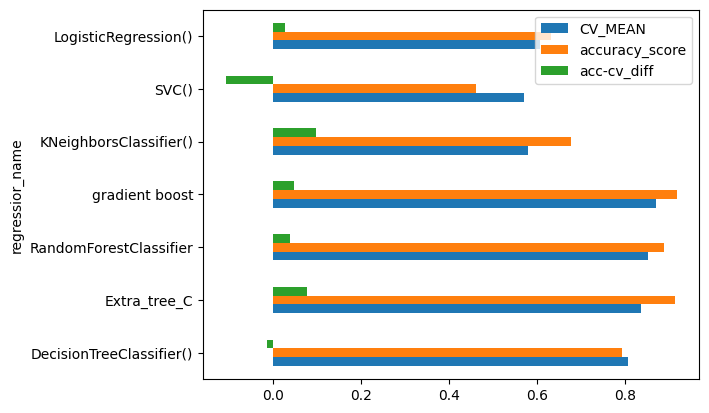

In [75]:
ml_compare=pd.DataFrame()
DT_C={'regressior_name':DTC,'CV_MEAN':cv_mean_dtc,'accuracy_score':acc_dtc,'acc-cv_diff':diff_dtc_score}
ET_C={'regressior_name':'Extra_tree_C','CV_MEAN':cv_mean_etc,'accuracy_score':acc_ETC,'acc-cv_diff':diff_etc_score}
RF_C={'regressior_name':'RandomForestClassifier','CV_MEAN':cv_mean_RF,'accuracy_score':acc_RF,'acc-cv_diff':diff_RF_score}
GB_C={'regressior_name':'gradient boost','CV_MEAN':cv_mean_GB,'accuracy_score':acc_GB,'acc-cv_diff':diff_GB_score}
KNN_C={'regressior_name':KN,'CV_MEAN':cv_mean_KN,'accuracy_score':acc_KN,'acc-cv_diff':diff_KN_score}
SV_C={'regressior_name':SV,'CV_MEAN':cv_mean_SV,'accuracy_score':acc_SV,'acc-cv_diff':diff_SV_score}
LG={'regressior_name':LG,'CV_MEAN':cv_mean_LG,'accuracy_score':acc_LG,'acc-cv_diff':diff_LG_score}
ml_compare=ml_compare.append([DT_C,ET_C,RF_C,GB_C,KNN_C,SV_C,LG],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.barh()
plt.show()

In [76]:
p1={'criterion':['entropy','gini','log_loss'],'n_estimators':[100],'random_state':[150,200]}
GCV=GridSearchCV(ExtraTreesClassifier(),param_grid=p1,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 200}


In [80]:
final_model_classification=ExtraTreesClassifier(
criterion= 'entropy',n_estimators=100, 
random_state=150)
final_model_classification.fit(x_train,y_train)
pred=final_model_classification.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.1504424778761


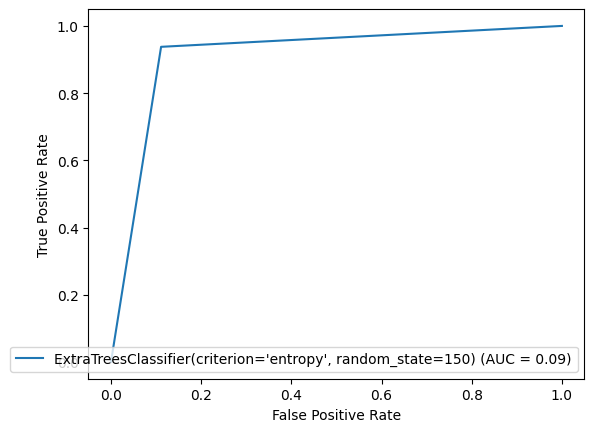

In [81]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(tpr,fpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model_classification)
display.plot()

In [83]:
import pickle
file_name='Insurance_fraud_analysis.pkl'
pickle.dump(final_model_classification,open(file_name,'wb'))